## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 2 csv files in the current version of the dataset:


In [2]:
print(os.listdir('data/hackstat2k19'))

['sample_submisison.csv', 'Trainset.csv', 'xtest.csv']


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: data/hackstat2k19/Trainset.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('data/hackstat2k19/Trainset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Trainset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,2,2,9,10,Returning_Visitor,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,2,4,4,2,Returning_Visitor,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,1,1,1,3,New_Visitor,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,0


Distribution graphs (histogram/bar graph) of sampled columns:

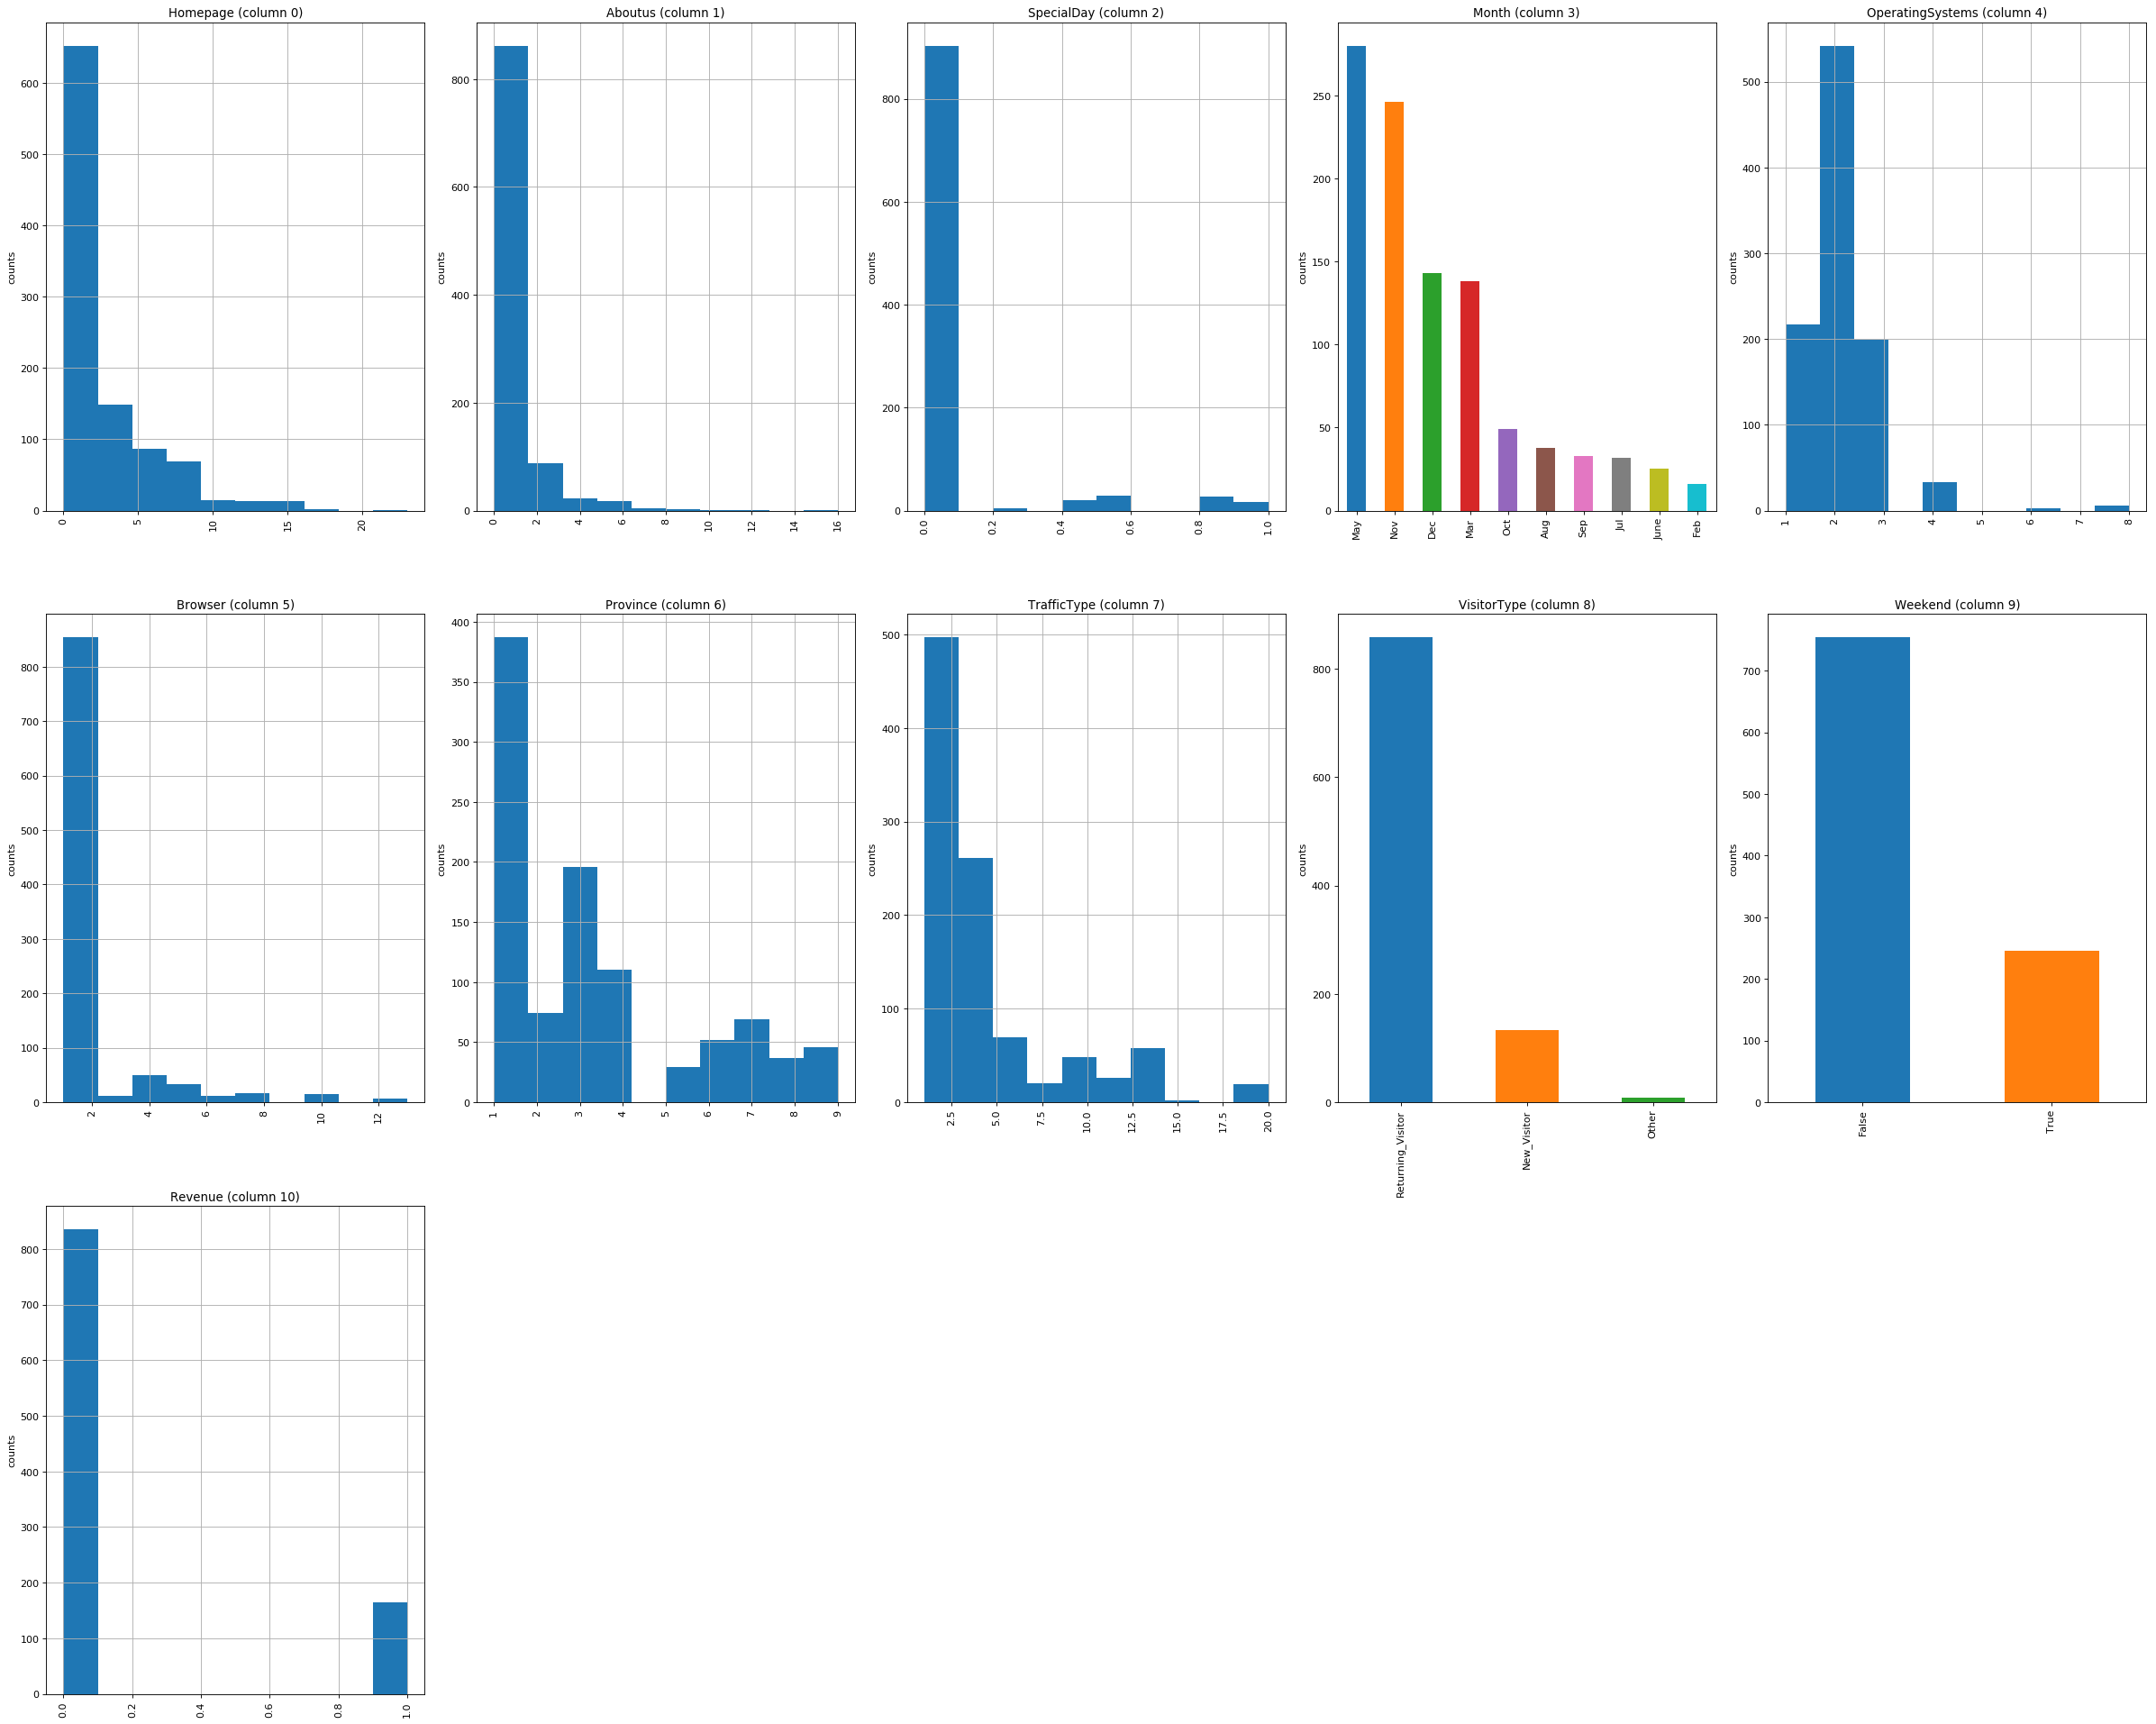

In [8]:
plotPerColumnDistribution(df1, 40, 5)

Correlation matrix:

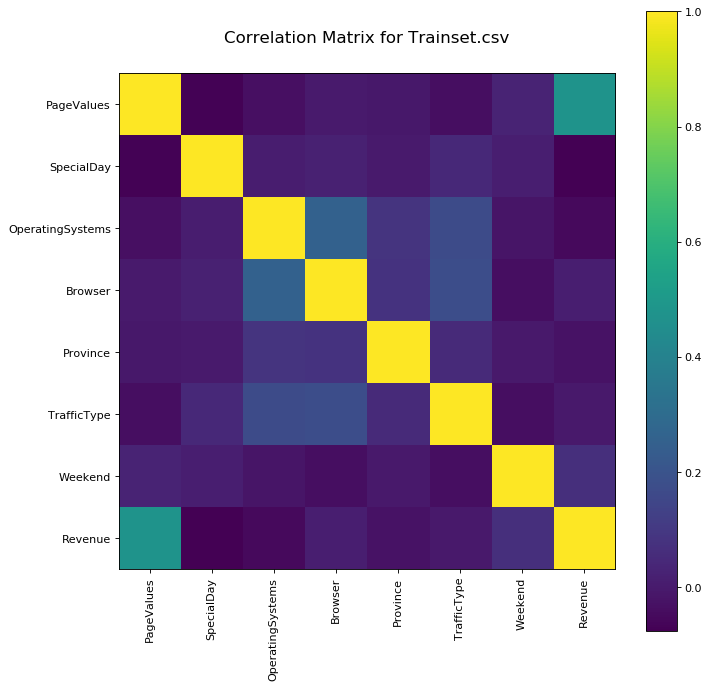

In [9]:
plotCorrelationMatrix(df1, 10)

Scatter and density plots:

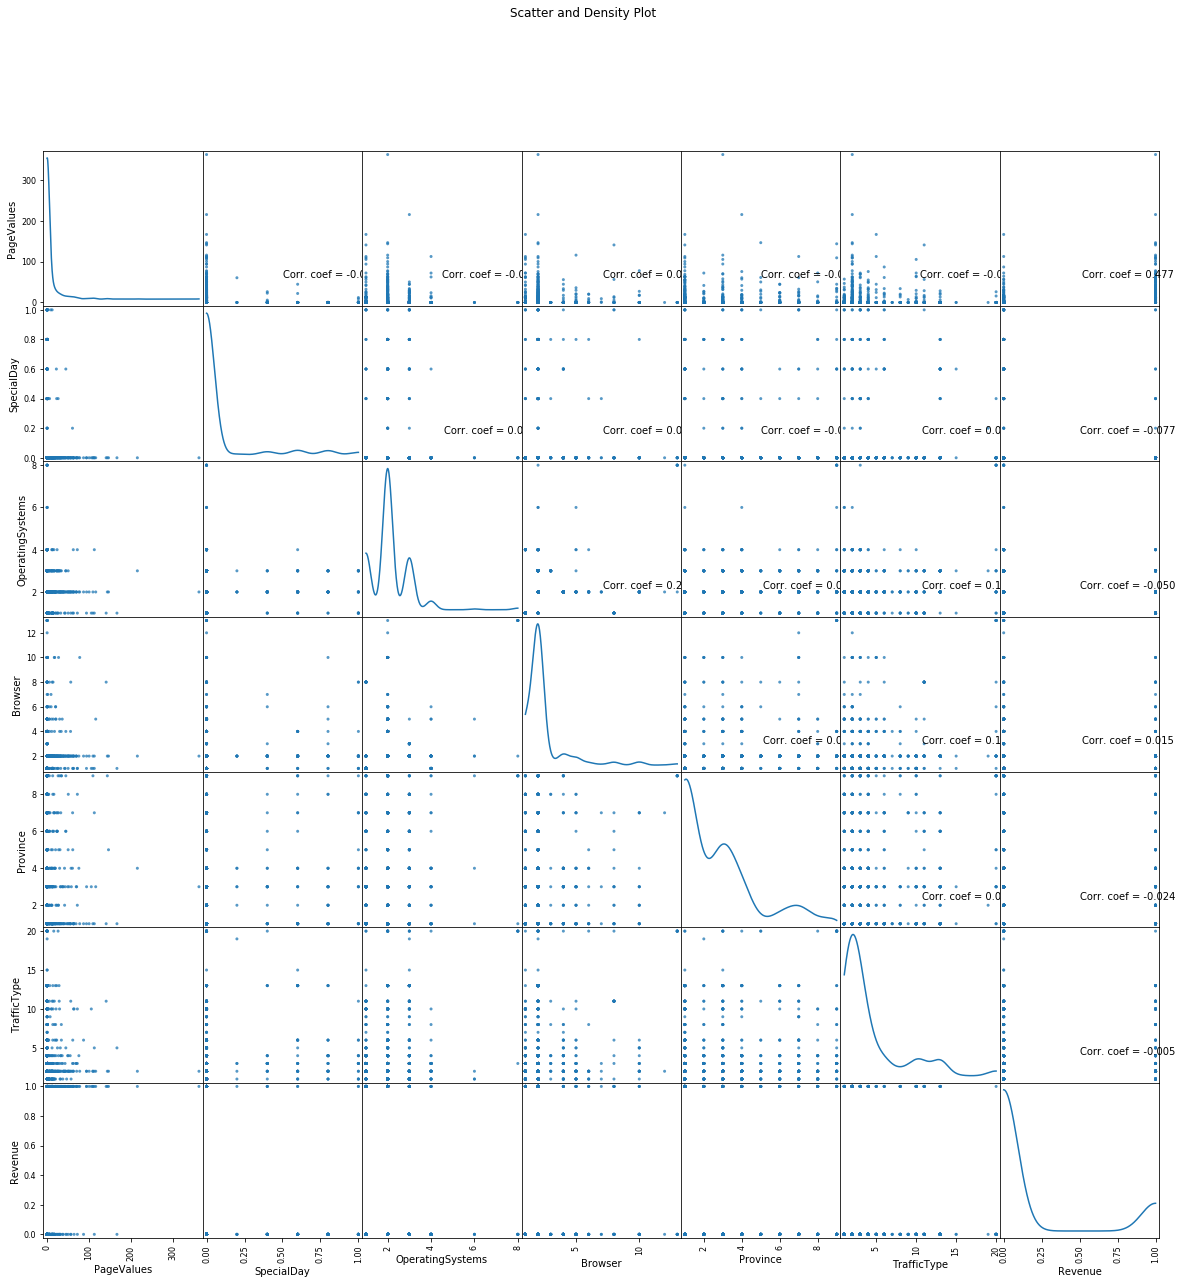

In [10]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: data/hackstat2k19/xtest.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv('data/hackstat2k19/xtest.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'xtest.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,ID,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,May,1,1,1,1,Returning_Visitor,False
1,2,0,0.0,0,0.0,24,743.750000,0.000000,0.016667,0.0,0.0,Dec,2,2,2,2,New_Visitor,True
2,3,0,0.0,0,0.0,13,129.500000,0.015385,0.053846,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False
3,4,3,84.0,0,0.0,59,1720.422222,0.026984,0.038232,0.0,0.0,Oct,3,2,1,3,Returning_Visitor,True
4,5,0,0.0,0,0.0,13,390.500000,0.038462,0.053846,0.0,0.0,Dec,2,2,1,13,Returning_Visitor,False


Distribution graphs (histogram/bar graph) of sampled columns:

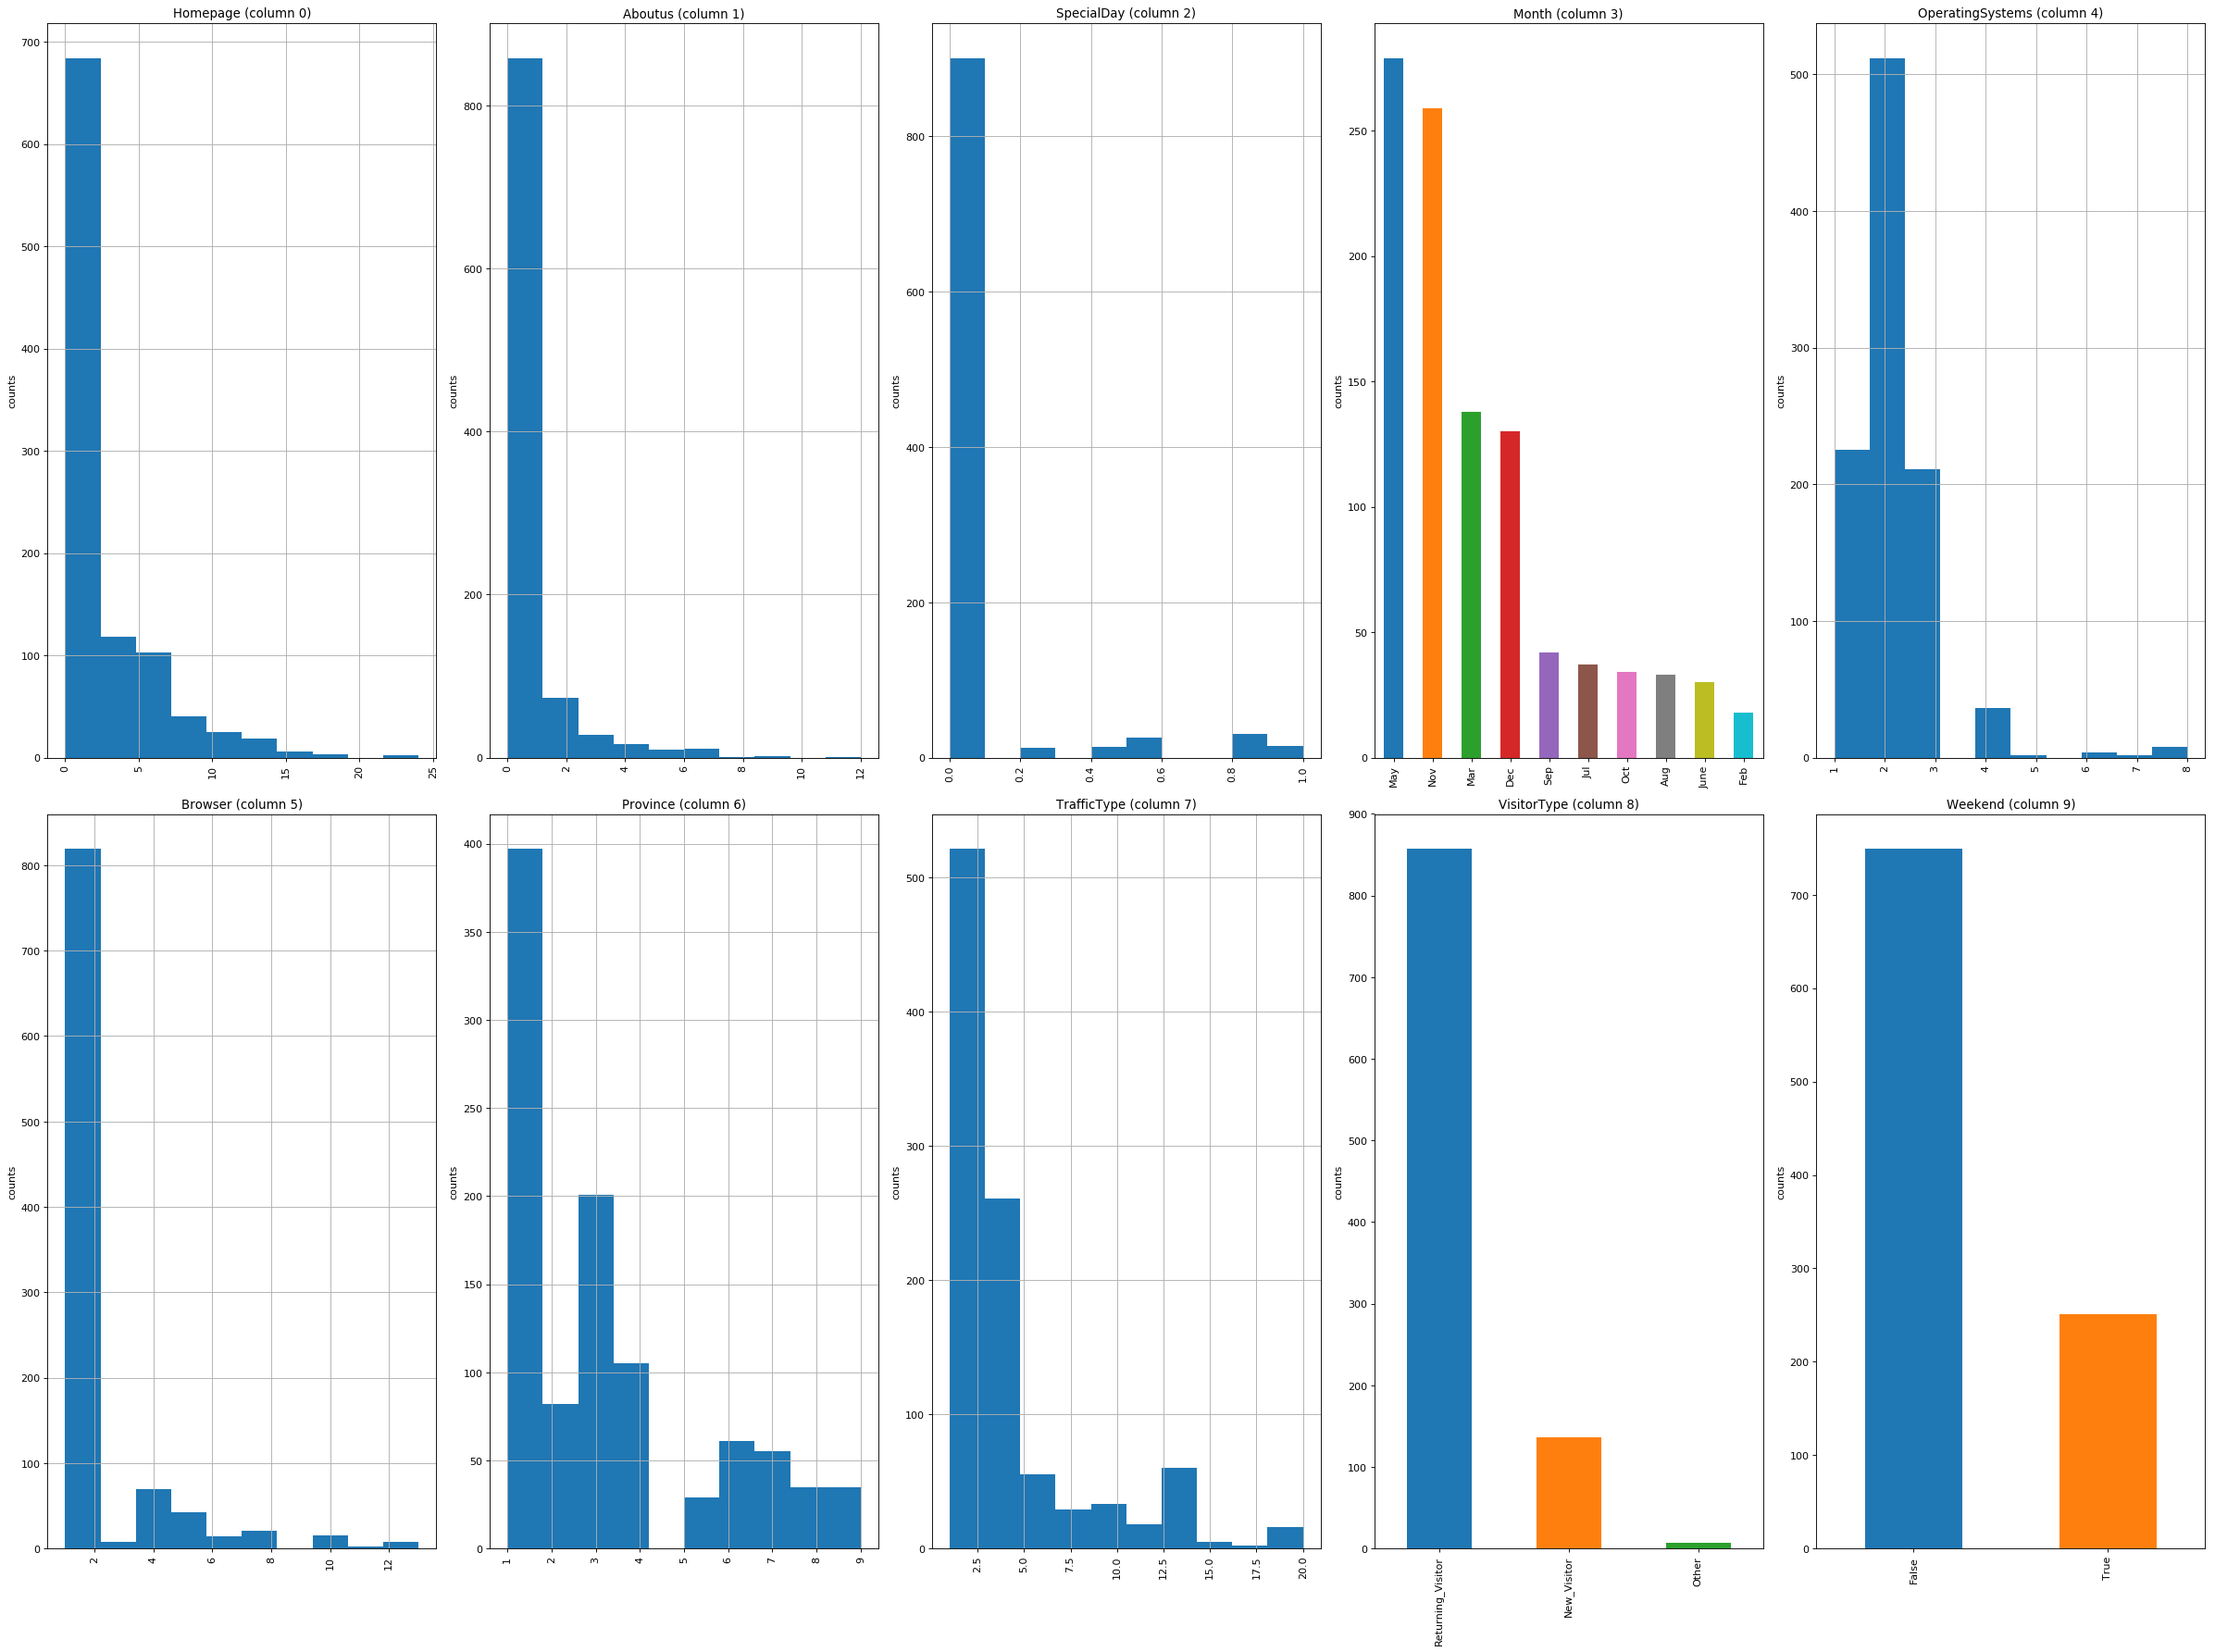

In [13]:
plotPerColumnDistribution(df2, 40, 5)

Correlation matrix:

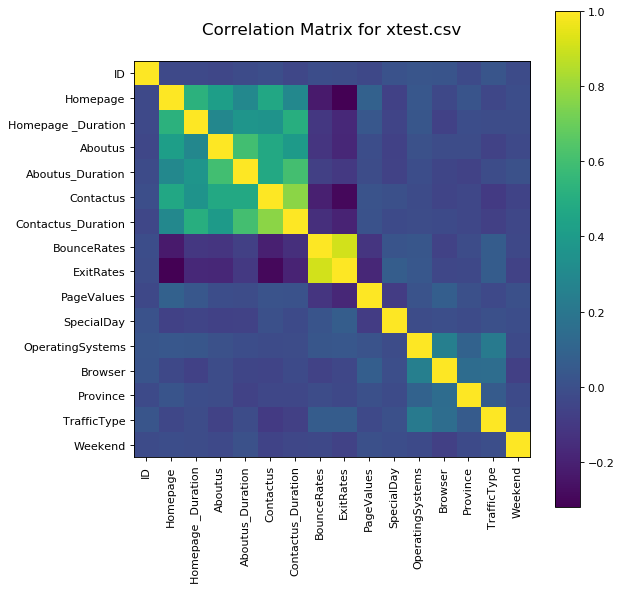

In [14]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

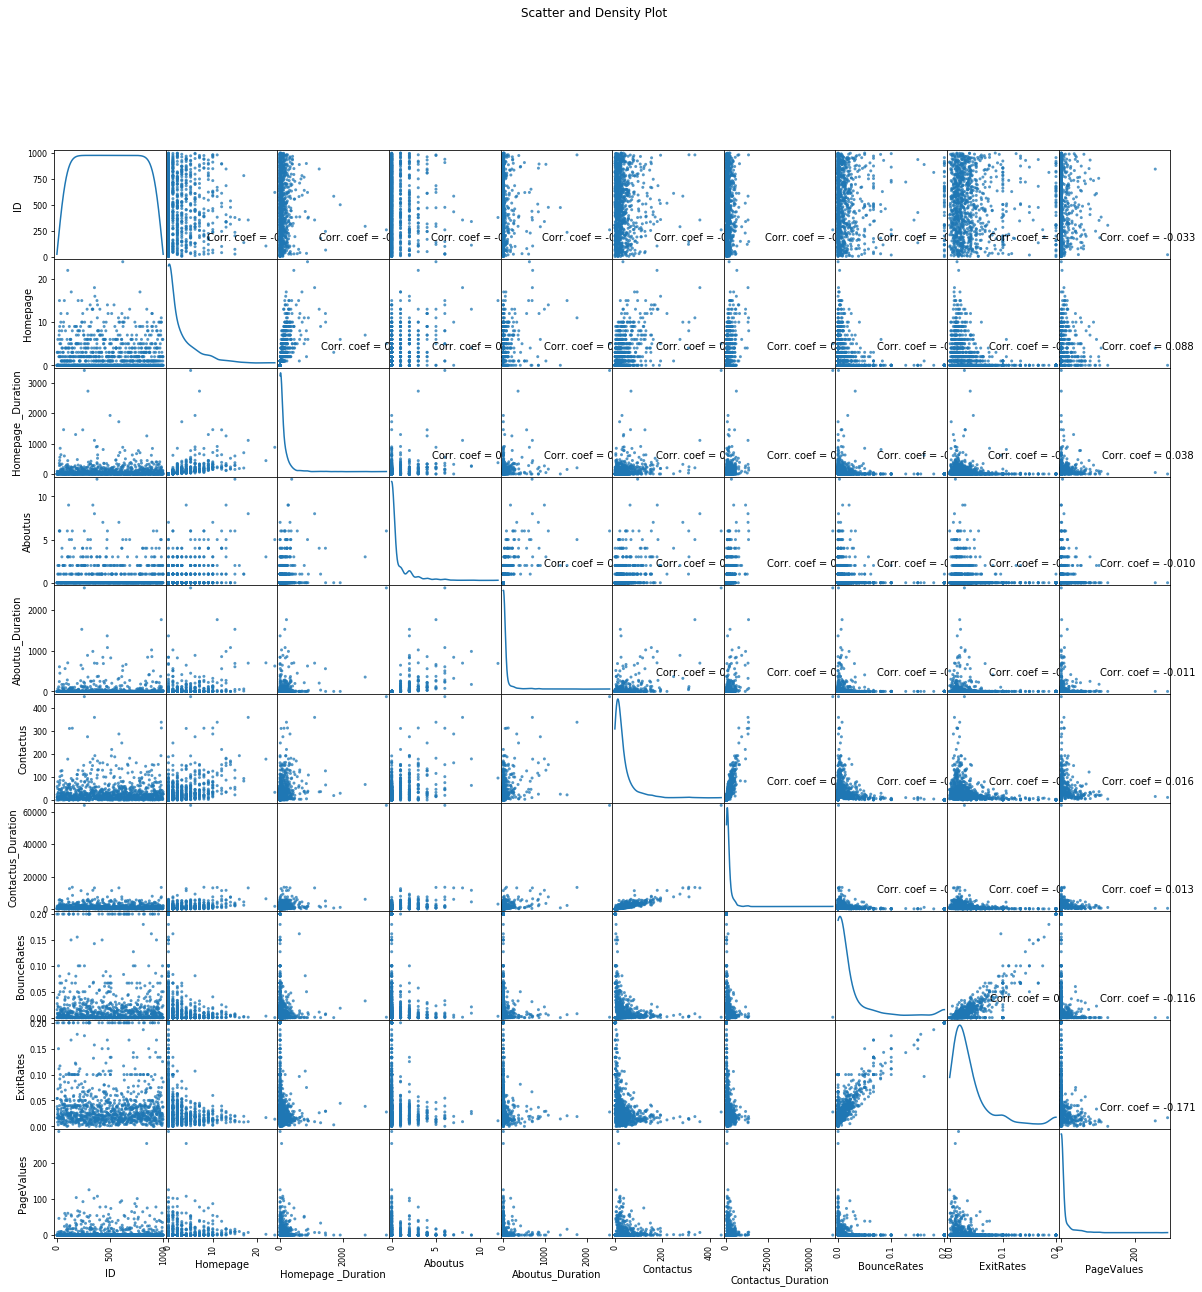

In [15]:
plotScatterMatrix(df2, 20, 10)